In [1]:
pip install keras_preprocessing


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
import keras.preprocessing
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import shutil
TRAINING_DIR = "D:\Tarp\Train"

training_datagen = ImageDataGenerator(rescale=1./255,
                                    zoom_range=0.15,
                                    horizontal_flip=True,
                                   fill_mode='nearest')

VALIDATION_DIR = "D:\Tarp\Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	shuffle = True,
	class_mode='categorical',
  batch_size = 128
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
	shuffle = True,
  batch_size= 14
)

Found 2700 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [4]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout

input_tensor = Input(shape=(224, 224, 3))

base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

87910968/87910968 [==============================] - 122s 1us/step


In [5]:
"""class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.1099 and logs.get('loss')<=0.1099):
      print('\n\n Reached The Destination!')
      self.model.stop_training = True
callbacks = myCallback()
"""
history = model.fit(
    train_generator,
    steps_per_epoch = 2,
    epochs = 2,
    validation_data = validation_generator,
    validation_steps = 2,
  #  callbacks=[callbacks]
)

Epoch 1/2
2/2 [==============================] - 25s 10s/step - loss: 28.9475 - acc: 0.3203 - val_loss: 39.2456 - val_acc: 0.2143
Epoch 2/2
2/2 [==============================] - 17s 9s/step - loss: 15.4635 - acc: 0.3867 - val_loss: 2.4208 - val_acc: 0.3214


In [6]:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['acc'])


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.1099 and logs.get('loss')<=0.1099):
      print('\n\n Reached The Destination!')
      self.model.stop_training = True
callbacks = myCallback()

history = model.fit(
    train_generator,
    steps_per_epoch = 2,
    epochs = 2,
    validation_data = validation_generator,
    validation_steps = 2,
    callbacks=[callbacks]
)
print(len(base_model.layers))

Epoch 1/2
2/2 [==============================] - 34s 16s/step - loss: 1.4461 - acc: 0.4336 - val_loss: 1.2230 - val_acc: 0.5000
Epoch 2/2
2/2 [==============================] - 23s 11s/step - loss: 1.1930 - acc: 0.3750 - val_loss: 0.7171 - val_acc: 0.7500
311


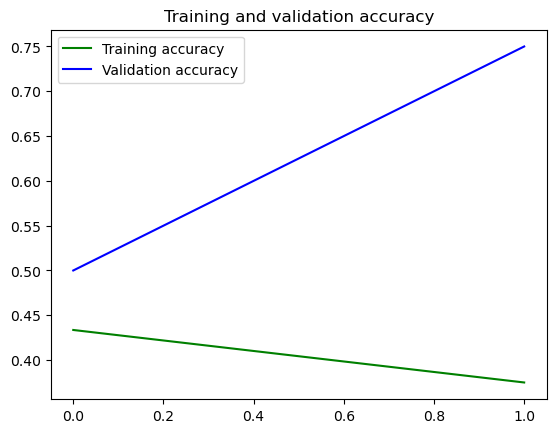

<Figure size 640x480 with 0 Axes>

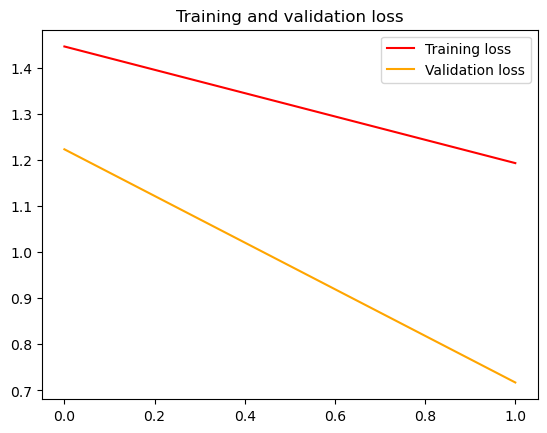

<Figure size 640x480 with 0 Axes>

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()

In [10]:
#predicting any random image
import numpy as np
from PIL import Image
import keras.utils as image
from keras.models import load_model

file_path="D:/Tarp/Test/Fire/image_26.jpg"
uploaded = Image.open(file_path)
#model=load_model('model.h5')
img=image.load_img(file_path, target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)/255.0
classes=model.predict(x)

if(np.argmax(classes[0])==0):
    print("Fire Detected")
    print(np.argmax(classes[0])==0, max(classes[0]))
elif(np.argmax(classes[0])==2):
    print("Smoke Detected")
    print(np.argmax(classes[0])==2, max(classes[0]))
else:
    print("No Fire or Smoke Detected")
    print(np.argmax(classes[0])==1, max(classes[0]))

1/1 [==============================] - 3s 3s/step
Fire Detected
True 0.4341965
